# Analyse ROMY Events

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sixdegrees import sixdegrees

## Configurations

In [2]:
config = {
    # Required time window parameters
    'tbeg': "2025-07-29 23:30:00",  # Start time
    'tend': "2025-07-30 01:30:00",  # End time

    # event
    'origin_time': "2025-07-29 23:24:50",
    'magnitude': 8.8,

    # Station coordinates (required)
    'station_lon': 11.275476,  # BSPF longitude
    'station_lat': 48.162941,    # BSPF latitude
    
    # SEED identifiers
    'seed': "XX.ROMY..",     # Default seed ID
    'rot_seed': ["BW.ROMY.10.BJZ", "BW.ROMY..BJU", "BW.ROMY..BJV"], # "BW.ROMY.30.BJ*",  # Rotation sensor seed ID
    'tra_seed': ["GR.FUR..BHZ", "GR.FUR..BHN", "GR.FUR..BHE"],  # Translation sensor seed ID
    
    # Data source
    'data_source': "sds",  # "fdsn" | "sds" | "mseed_file"

    # Path to local mseed file
    # 'path_to_mseed_file': "./data/romy_eventM6.8.mseed",  # "./data/eventM62_6c.mseed",

    # Path to SDS for rotation and translation data
    'path_to_sds_rot': "/home/andbro/freenas/romy_archive/",    # SDS path for rotation data
    'path_to_sds_tra': "/home/andbro/bay200/mseed_online/archive/",  # SDS path for translation data

    # Path to inventory of rotation and translation sensor
    'path_to_inv_rot': "/home/andbro/kilauea-data/stationxml_ringlaser/station_BW_ROMY.xml",  # Rotation station inventory
    'path_to_inv_tra': "/home/andbro/kilauea-data/stationxml_ringlaser/station_GR_FUR.xml",  # Translation station inventory
    
    # Path configurations
    'workdir': "./",            # Working directory
    'path_to_data_out': "./output/",  # Output directory

    # Set rotation of components
    'rotate_zne': True,

    # Rotate ROMY components
    'use_romy_zne': False,
    'keep_z': True,

    # Remove responses
    'tra_remove_response': True,
    'rot_remove_response': True,

    # Project information
    'project': "ROMY_Analysis",  # Project name

    # Backazimuth calculation parameters
    'baz_step': 1,               # Step size for backazimuth search in degrees
    'time_win_sec': 30,          # Window length in seconds
    'time_win_overlap': 15,  # Window overlap in seconds

    # Optional parameters
    'verbose': True,            # Print detailed information
}

Setup a sixdegrees object

In [3]:
sd = sixdegrees(conf=config)

Store the configuration as a pickle file

Get key information about the event

In [33]:
try:
    ev = sd.get_event_info(origin_time=config['origin_time'],
                       base_catalog="ISC",
                       magnitude=config['magnitude'])
except:
    print("No event found")
    ev = {
        "backazimuth": 0,
        "distance_km": 0,
        "origin_time": config['origin_time'],
        "magnitude": config['magnitude']
    }

No event found


This will load the data from the data source:
- local mseed file
- local sds system
- fdsn (online)

and trim it to the time window

In [5]:
sd.load_data(config['tbeg'], config['tend'])

-> fetching GR.FUR..BHZ data from SDS
-> fetching GR.FUR..BHN data from SDS
-> fetching GR.FUR..BHE data from SDS
-> translation inventory provided: /home/andbro/kilauea-data/stationxml_ringlaser/station_GR_FUR.xml
-> removing response: ACC
-> rotating translational data ZNE to ZNE
3 Trace(s) in Stream:
GR.FUR..BHZ | 2025-07-29T23:29:58.989999Z - 2025-07-30T01:30:00.989999Z | 20.0 Hz, 144041 samples
GR.FUR..BHN | 2025-07-29T23:29:58.989999Z - 2025-07-30T01:30:00.989999Z | 20.0 Hz, 144041 samples
GR.FUR..BHE | 2025-07-29T23:29:58.989999Z - 2025-07-30T01:30:00.989999Z | 20.0 Hz, 144041 samples
-> fetching BW.ROMY.10.BJZ data from SDS
-> fetching BW.ROMY..BJU data from SDS


/home/andbro/anaconda3/envs/obs2/lib/python3.10/site-packages/obspy/io/mseed/headers.py:823: InternalMSEEDWarning: readMSEEDBuffer(): Record with offset=276480 has a fractional second (.0001 seconds) of 10000. This is not strictly valid but will be interpreted as one or more additional seconds.
  warnings.warn(_w, InternalMSEEDWarning)
/home/andbro/anaconda3/envs/obs2/lib/python3.10/site-packages/obspy/io/mseed/headers.py:823: InternalMSEEDWarning: readMSEEDBuffer(): Record with offset=279040 has a fractional second (.0001 seconds) of 10000. This is not strictly valid but will be interpreted as one or more additional seconds.
  warnings.warn(_w, InternalMSEEDWarning)
/home/andbro/anaconda3/envs/obs2/lib/python3.10/site-packages/obspy/io/mseed/headers.py:823: InternalMSEEDWarning: readMSEEDBuffer(): Record with offset=285696 has a fractional second (.0001 seconds) of 10000. This is not strictly valid but will be interpreted as one or more additional seconds.
  warnings.warn(_w, Internal

-> fetching BW.ROMY..BJV data from SDS
-> rotation inventory provided: /home/andbro/kilauea-data/stationxml_ringlaser/station_BW_ROMY.xml
-> removing sensitivity
3 Trace(s) in Stream:
BW.ROMY.10.BJZ | 2025-07-29T23:29:58.985200Z - 2025-07-30T01:30:00.985200Z | 20.0 Hz, 144041 samples
BW.ROMY..BJU   | 2025-07-29T23:29:59.000001Z - 2025-07-30T01:30:01.000001Z | 20.0 Hz, 144041 samples
BW.ROMY..BJV   | 2025-07-29T23:29:59.031200Z - 2025-07-30T01:30:00.981200Z | 20.0 Hz, 144040 samples


Ensure that all traces of stream have the same sample size

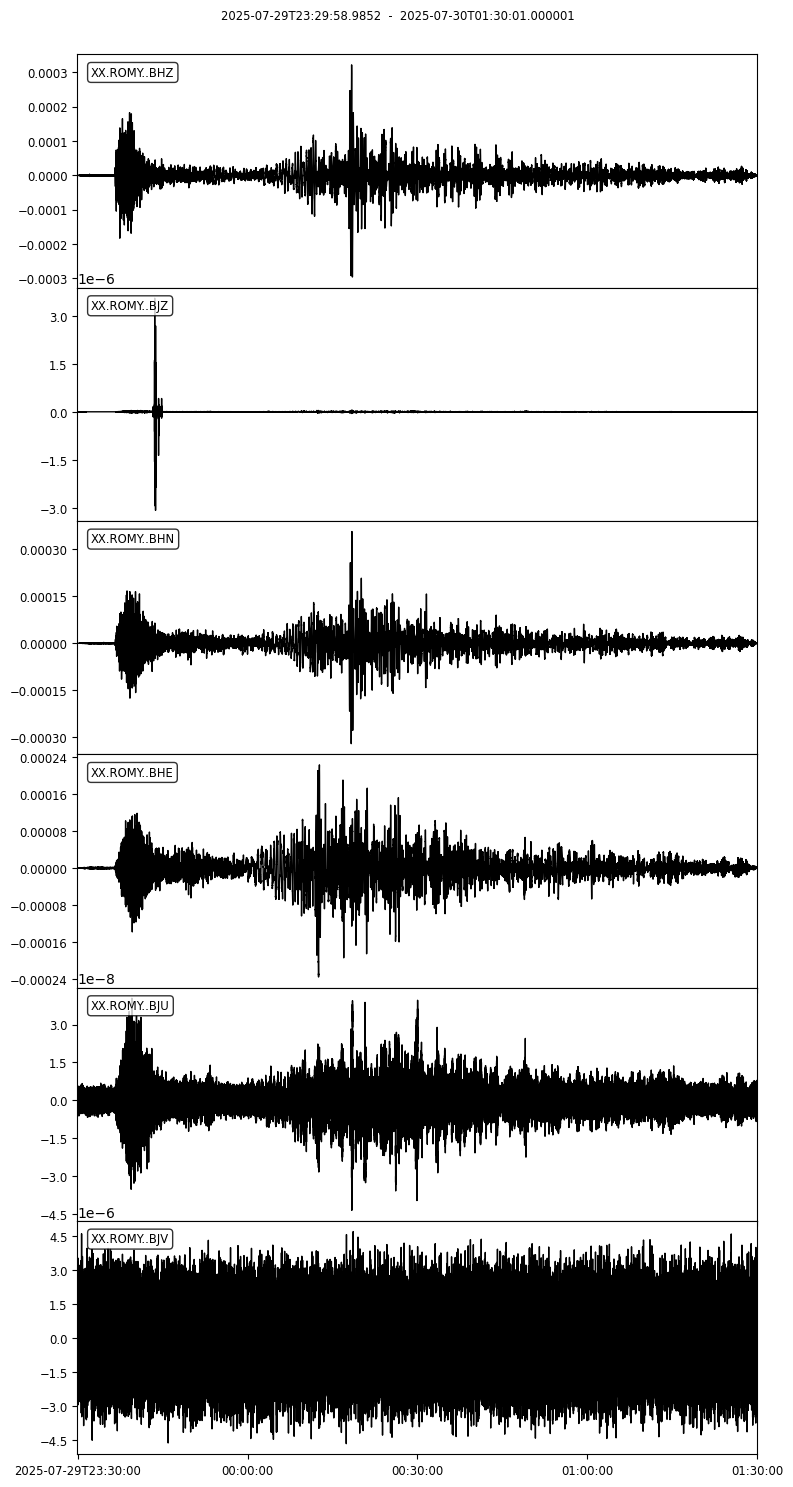

In [8]:
sd.st.plot(equal_scale=False);

In [9]:
sd.trim_stream(set_common=True, set_interpolate=False)

 -> stream size inconsistent: [144041, 144041, 144041, 144041, 144041, 144040]
  -> adjusted: [144040, 144040, 144040, 144040, 144040, 144040]


## Analysis

Frequency band to filter (this is applied to the stream object after being reset to raw stream)

In [13]:
sd.filter_data(fmin=0.01, fmax=0.1, output=False)

Apply polarity correction if needed. This is applied to the stream object that is processed. If raw is True, the polarity correction is applied to the raw stream too.

In [14]:
sd.polarity_stream(pol_dict={"HZ": -1, "JZ": 1}, raw=True)

In [15]:
sd.st.trim(sd.tbeg+1500, sd.tend-2500)

6 Trace(s) in Stream:
XX.ROMY..BHZ | 2025-07-29T23:54:59.989999Z - 2025-07-30T00:48:19.989999Z | 20.0 Hz, 64001 samples
XX.ROMY..BHN | 2025-07-29T23:54:59.989999Z - 2025-07-30T00:48:19.989999Z | 20.0 Hz, 64001 samples
XX.ROMY..BHE | 2025-07-29T23:54:59.989999Z - 2025-07-30T00:48:19.989999Z | 20.0 Hz, 64001 samples
XX.ROMY..BJZ | 2025-07-29T23:54:59.985200Z - 2025-07-30T00:48:19.985200Z | 20.0 Hz, 64001 samples
XX.ROMY..BJU | 2025-07-29T23:55:00.000001Z - 2025-07-30T00:48:20.000001Z | 20.0 Hz, 64001 samples
XX.ROMY..BJV | 2025-07-29T23:54:59.981200Z - 2025-07-30T00:48:19.981200Z | 20.0 Hz, 64001 samples

let's compare the waveforms of the rotation (red) and translational (black) components 

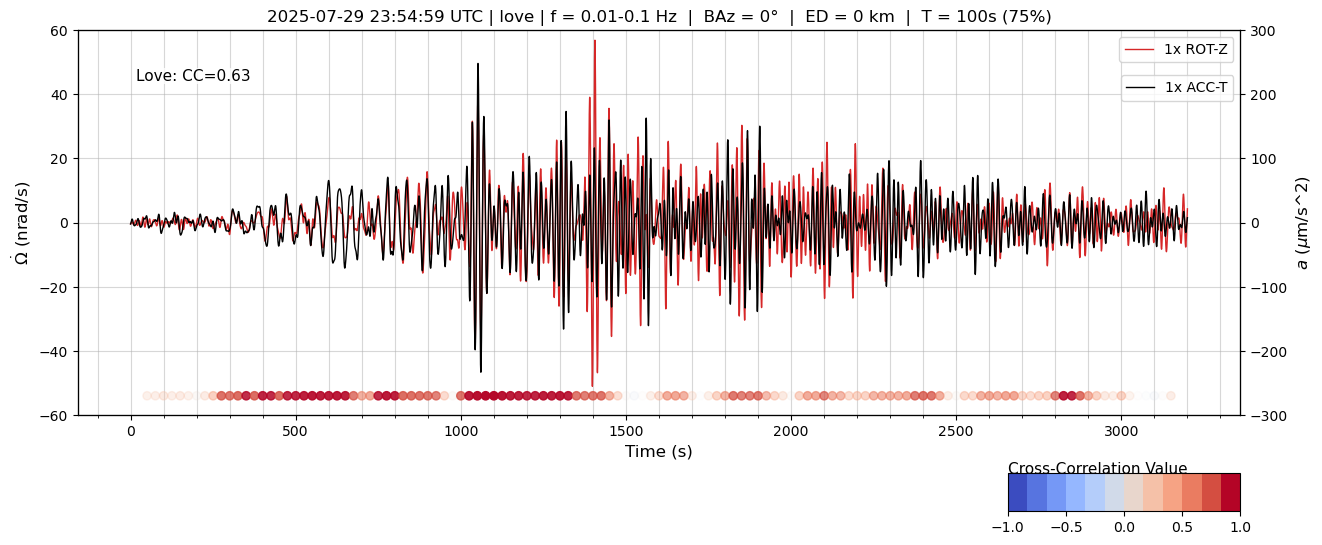

In [22]:
fig = sd.plot_waveform_cc(
    rot0=sd.get_stream("rotation"),
    acc0=sd.get_stream("translation"),
    baz=ev['backazimuth'],
    distance=ev['distance_km'],
    fmin=sd.fmin,
    fmax=sd.fmax, 
    twin_sec=100,
    twin_overlap=0.75,
    wave_type="love"
)

### Backazimuth Estimate

In [23]:
# First compute backazimuth
baz_results = sd.compute_backazimuth(
    wave_type='love',
    baz_step=1,
    baz_win_sec=100,
    baz_win_overlap=0.507,
    out=True
)


baz_max = 46, baz_std = 22


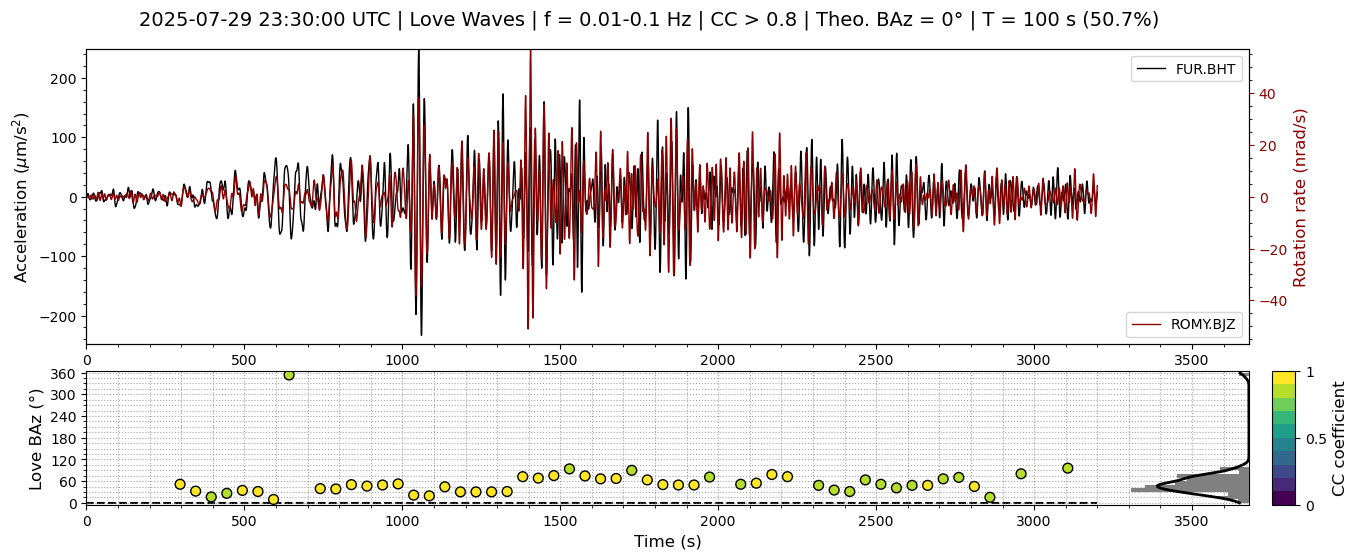

In [24]:

# Then plot results
fig = sd.plot_backazimuth_results(
    baz_results,
    wave_type='love',
    baz_theo=ev['backazimuth'],
    cc_threshold=0.8,  # optional
)

### Analyse phase velocities

In [43]:
# Compute Love wave velocities
love_velocities = sd.compute_velocities(
    wave_type='love',
    win_time_s=100,
    overlap=0.75,
    cc_threshold=0,
    method='odr',
    baz=ev['backazimuth']  # optional
)


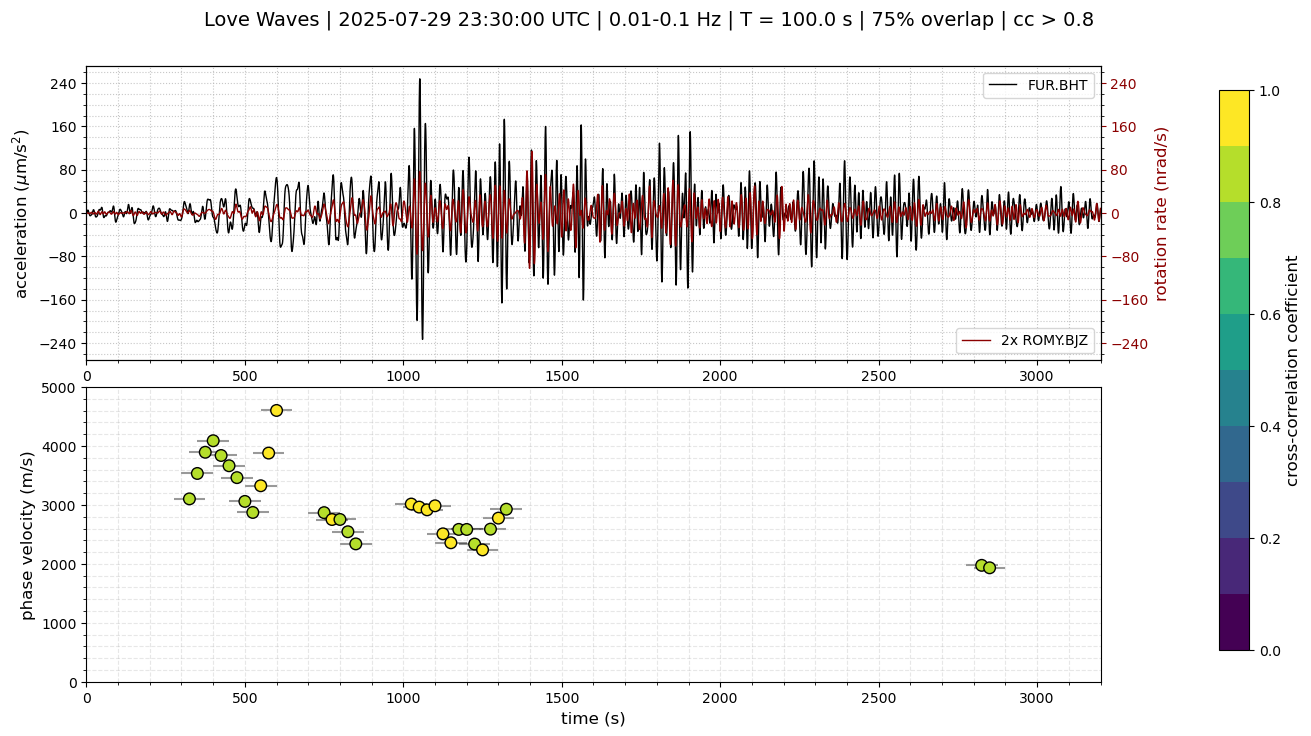

In [44]:
# Plot results
fig = sd.plot_velocities(
    velocity_results=love_velocities,
    vmax=5000,  # optional
    minors=True, # optional
    cc_threshold=0.8
)